<a href="https://colab.research.google.com/github/phycem/Dark-Matter-Astrophysics-project/blob/main/Case_Study_3_Digit_Recognition_with_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


To explore enural networks great simulation: 
https://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.003&regularizationRate=0&noise=0&networkShape=4,2&seed=0.03636&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

# 🔢 **Recognizing handwritten numbers with Neural Networks!**

In this case study, I do:
- Explore the digit data set
- Train a simple K-neighbors classifier and logistic regression classifier for computer vision
- Train neural nets to be able to classify handwritten numbers
- Improve your model with convolutional neural networks!
- (Optional challenge) Use a saliency map to implement explainable AI

## 🖼 **Getting the image data**

In [ ]:
#@title importing my libraries!
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Activation
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

def get_data():
  X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
  return X[:5000], y[:5000]

def plot_acc(history, ax = None, xlabel = 'Epoch #'):
    history = history.history
    history.update({'epoch':list(range(len(history['val_accuracy'])))})
    history = pd.DataFrame.from_dict(history)

    best_epoch = history.sort_values(by = 'val_accuracy', ascending = False).iloc[0]['epoch']

    if not ax:
      f, ax = plt.subplots(1,1)
    sns.lineplot(x = 'epoch', y = 'val_accuracy', data = history, label = 'Validation', ax = ax)
    sns.lineplot(x = 'epoch', y = 'accuracy', data = history, label = 'Training', ax = ax)
    ax.axhline(0.5, linestyle = '--',color='red', label = 'Chance')
    ax.axvline(x = best_epoch, linestyle = '--', color = 'green', label = 'Best Epoch')  
    ax.legend(loc = 3)    
    ax.set_ylim([min(history['val_accuracy']), max(history['accuracy'])])

    ax.set_xlabel(xlabel)
    ax.set_ylabel('Accuracy (Fraction)')
    
    plt.show()


Exploring the data set: The input `X` is an array of images (where each image is a list of pixel values), and the output `y` is the classification of that image.

In [ ]:
X, y = get_data()
X = X.to_numpy() 

 The dimensions of `X` counts number of digits and `y` counts number of pixels in each image. Let's say if our images are squares, then the heights and width sould be 28x28

In [ ]:
print("x dimensions =",X.shape)
print("y dimensions =",y.shape) 

x dimensions = (5000, 784)
y dimensions = (5000,)


### 💭 **Reshaping our data**
The images here are one dimensional. Hence I use the `numpy` `reshape` function to make them 2D images. 

In [ ]:
X_2d = X.reshape((5000, 28, 28))

In [ ]:
print(X_2d.shape)

(5000, 28, 28)


### 🔍 **Let's take a look at some images!**


The label for this image is 5


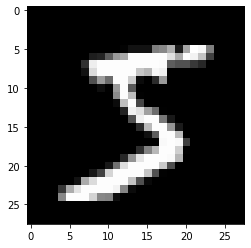

In [ ]:
image_number = 0

plt.imshow(X_2d[image_number], cmap = "gray")
print("The label for this image is", y[image_number])

I check to see examples of numbers from every class. 

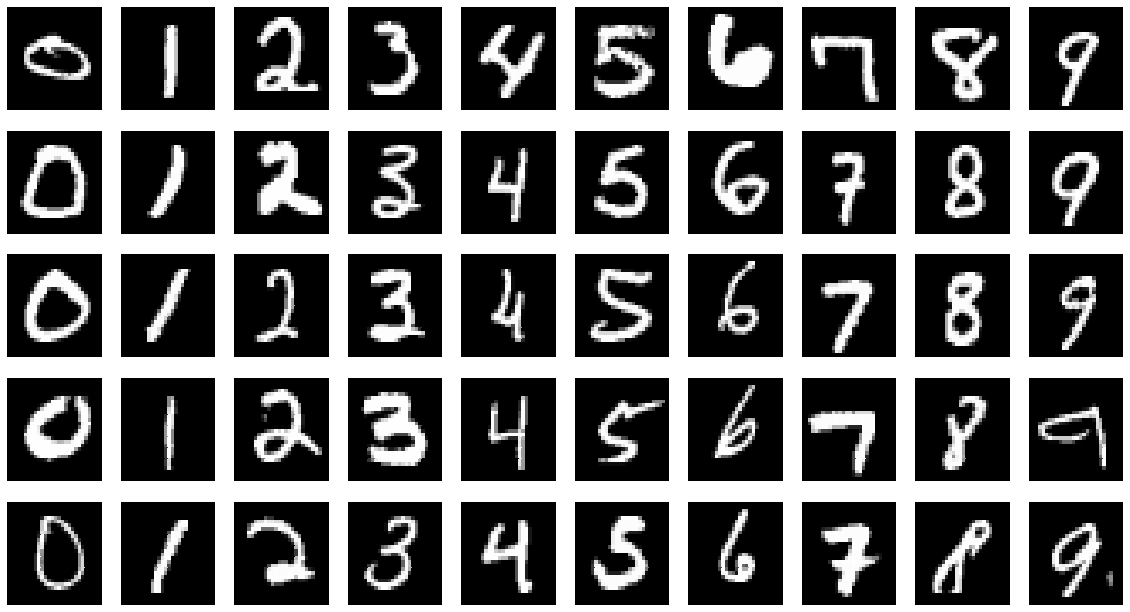

In [ ]:
#@title Run me to see numbers from every class!
classes = ['0', '1', '2','3', '4','5', '6', '7', '8', '9']
nclasses = len(classes)

samples_per_class = 5
figure = plt.figure(figsize=(nclasses*2,(1+samples_per_class*2)));

for idx_cls, cls in enumerate(classes):
  idxs = np.flatnonzero(y == cls)
  idxs = np.random.choice(idxs, samples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt_idx = i * nclasses + idx_cls + 1
    p = plt.subplot(samples_per_class, nclasses, plt_idx);
    p = sns.heatmap(np.reshape(X[idx], (28,28)), cmap=plt.cm.gray, 
             xticklabels=False, yticklabels=False, cbar=False);
    p = plt.axis('off');

**How many images of each class are in the overall data set?**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


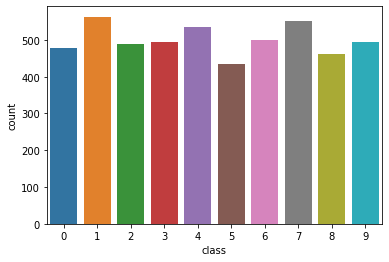

In [ ]:
sns.countplot(y)

**Testing two of less complex models: KNN and logistic regression.**
First split into testing and training data.

---



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [ ]:
print(y_train.shape[0])
print(y_test.shape[0])

4000
1000


## 🗒 **Logistic Regression Model**
 

Build, train, and measure the accuracy of the logistic regression model. 

In [ ]:
### YOUR CODE HERE

## Step 1: initialize model
lr_model = LogisticRegression(penalty='none', 
                         tol=0.1, solver='saga',
                         multi_class='multinomial') # we've added in a few extra parameters. Feel free to look at the documentation!
## Step 2: train model
train_model = lr_model.fit(X_train,y_train)
## Step 3: make predictions on the test data
y_pred = train_model.predict(X_test)

## Step 4: calculate the score on the test data and print it
score=accuracy_score(y_test,y_pred)
print(score)
### END CODE

0.895


### 🔡 **Coefficients**
We can use coefficient values to understand what features (i.e. which pixels) are important in determining what class a sample belongs to. A coefficient with a **larger magnitude** means that its feature is more important in the classification.

First let's look at the shape of our coefficients.  Coefficient dimension 0 is number of digits. Coefficient dimension 1 is number of pixels in each image. 

In [ ]:
lr_model.coef_.shape

(10, 784)

Let's plot the different coefficient matrices! Darker colors on these plots means that particular pixel value contributes more to the overall classification.

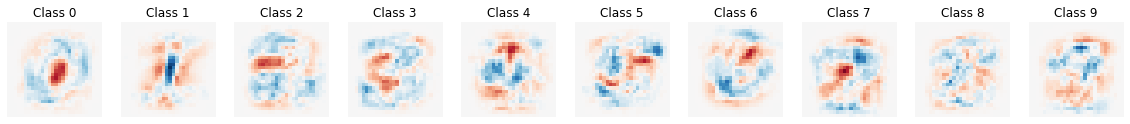

In [ ]:
scale = np.max(np.abs(lr_model.coef_))
nclasses=10

p = plt.figure(figsize=(20, 2.5));

for i in range(nclasses):
    p = plt.subplot(1, nclasses, i + 1)
    p = plt.imshow(lr_model.coef_[i].reshape(28, 28),
                  cmap=plt.cm.RdBu, vmin=-scale, vmax=scale); # plotting scaled coefficient values on a red blue scale
    p = plt.axis('off')
    p = plt.title('Class %i' % i);

### 🔢 **Getting conditional probabilities**
I can use the coefficient matrix to compute the conditional probabilities of a sample being in each class. The way we do this is by multiplying every pixel value by the corresponding coefficient, then adding on the intercept.

In the `mult_coefs` function below, I take the coefficients and the image and multiply them together.

In [ ]:
def mult_coefs(coefficients, image):
  
  '''
    Returns the sum of each coefficient multiplied by its corresponding image pixel, all added together
  '''
  return np.dot(coefficients, image)

Now I've made that function, I can use it in our overall function!

In [ ]:
def find_probability(sample_index, model):
  probabilities = [0]*10
  for k in range(10):
    probabilities[k] += model.intercept_[k]
    probabilities[k] += mult_coefs(model.coef_[k], X_test[sample_index])

  exps = [np.exp(probabilities[k]) for k in range(10)]
  exps_sum = np.sum(exps) 
  return exps/exps_sum

Now I can plot the probabilities below. I can change the value of `index` to look at different image classifications. It is good at predicting where number 6 and number 1 are than number 9.

Actual label:  5


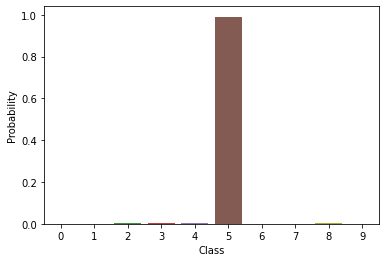

In [ ]:
# change this number to see different images
index = 5

prob = find_probability(index, lr_model)

sns.barplot(x = np.arange(0,10), y = prob);
plt.ylabel("Probability");
plt.xlabel("Class");
print("Actual label: ", y_test.iloc[index])

Actual label:  8


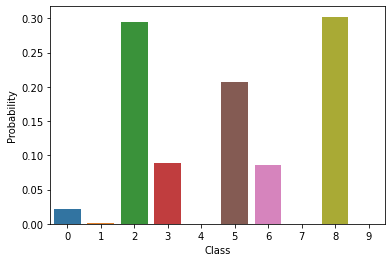

In [ ]:
index = 8

prob = find_probability(index, lr_model)

sns.barplot(x = np.arange(0,10), y = prob);
plt.ylabel("Probability");
plt.xlabel("Class");
print("Actual label: ", y_test.iloc[index])

Actual label:  0


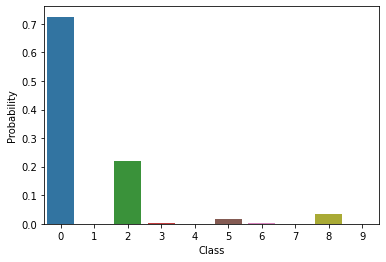

In [ ]:
index = 3

prob = find_probability(index, lr_model)

sns.barplot(x = np.arange(0,10), y = prob);
plt.ylabel("Probability");
plt.xlabel("Class");
print("Actual label: ", y_test.iloc[index])

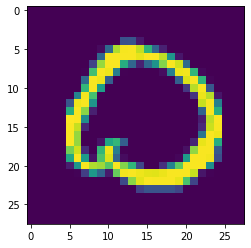

In [ ]:
plt.imshow(X_test[index].reshape((28,28)))

For this multi-class problem, I can extend the confusion matrix to have more rows and columns. The diagonal of the multi-class confusion matrix shows the number of correct classifications for each class, and other entries show instances where a sample from one class was mistakenly assigned a different class label. I create a confusion matrix using the pandas library's `crosstab` function.

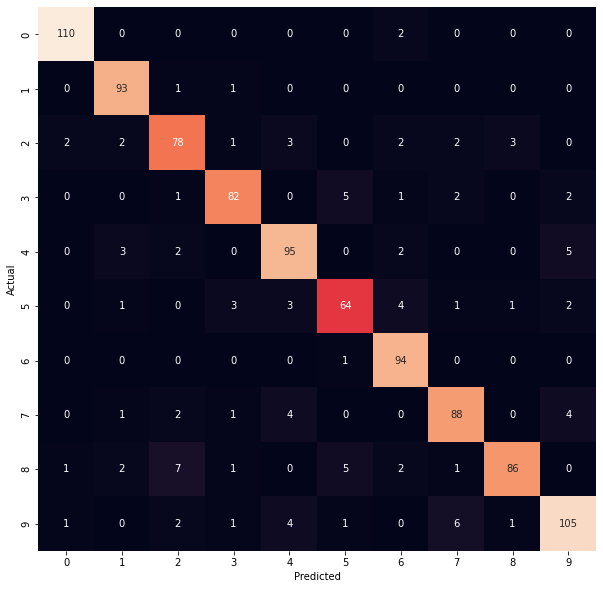

In [ ]:
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
p = plt.figure(figsize=(10,10));
p = sns.heatmap(cm, annot=True, fmt="d", cbar=False)

## 🗒 **KNN**

Now, I do the same thing with a k-Nearest-Neighbors model. In sklearn, the model is called `KNeighborsClassifier`. 

I build, train, and measure the accuracy of the KNN model and I experiment with changing the number of neighbors!

**NOTE:** (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [ ]:

## Step 1: initialize model
knn = KNeighborsClassifier(n_neighbors=3)

## Step 2: train model
train_model1=knn.fit(X_train,y_train)
## Step 3: make predictions on the test data
predict1=train_model1.predict(X_test)
## Step 4: calculate the score on the test data and print it
score=accuracy_score(y_test,predict1)
print(score)
### END CODE

0.925


### 🎛 **Choosing a value of k**
First determine the optimal value of "K" for my data using a for-loop to loop through different values of "K". In particular, *at the very least* trying K = 1, 3, 5, 10, 20, and 30. For each of these values of "K", I define a new KNN model, train it, and evaluate the accuracy. Optimal value is 1 or 5. There is no such great increase for higher K so picking "1" is good enough. 

In [ ]:

## Step 1: initialize model
for i in [1, 3, 5, 10, 20, 30]:
  knn = KNeighborsClassifier(n_neighbors=i)

## Step 2: train model
  train_model1=knn.fit(X_train,y_train)
## Step 3: make predictions on the test data
  predict1=train_model1.predict(X_test)
## Step 4: calculate the score on the test data and print it
  score=accuracy_score(y_test,predict1)
  print(i,score)


1 0.931
3 0.925
5 0.931
10 0.917
20 0.9
30 0.89


#### Questions 💡



# 📠 **Neural Networks**
Now, I create some new models using neural networks.

It was useful to to have a better understanding on how neural network nodes&nets and other parameters work by playing around with "TensorFlow Playground" (https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.62283&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&regularizationRate_hide=true&learningRate_hide=true&batchSize_hide=true&stepButton_hide=true&activation_hide=true) 

## 🗒 **MLP**
To build a simple neural network, I use `MLPClassifier` from scikit-learn. Like how I did in Tensorflow Playground, I will play with the **number of neurons** and the **number of hidden layers** to adjust the complexity of my model.

In my hidden layers, every neuron in one layer is connected to every neuron in the next.

**Note 1:**
Here's how a neural network with 1 hidden layer of 3 neurons created.

`nnet = MLPClassifier(hidden_layer_sizes=(3,)) `

**Note 2:**

Here's how a neural network with 2 hidden layers: one of 3 neurons and one of 4 neurons created.

`nnet = MLPClassifier(hidden_layer_sizes=(3, 4)) `

For the below exercise, the one layer with 10 neurons is the most accurate and accuracy is good enough to use this neural network.



In [ ]:
# Create and train our multi layer perceptron model
nnet = MLPClassifier(hidden_layer_sizes=(10,), random_state=9, solver="sgd", activation = "logistic")  ## 1 hidden layer. 10 neurons 
nnet.fit(X_train, y_train)

# Predict what the classes are based on the testing data
predictions = nnet.predict(X_test)

# Print the score on the testing data
print("MLP Testing Set Score:")
print(accuracy_score(y_test, predictions))

MLP Testing Set Score:
0.824


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
nnet = MLPClassifier(hidden_layer_sizes=(2,5), random_state=9, solver="sgd", activation = "logistic")  ## 2 hidden layers. 2 and 5 neurons in hidden layer 1 and hidden layer 2.
nnet.fit(X_train, y_train)

# Predict what the classes are based on the testing data
predictions = nnet.predict(X_test)

# Print the score on the testing data
print("MLP Testing Set Score:")
print(accuracy_score(y_test, predictions))

MLP Testing Set Score:
0.267


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


### 🎛 Automating our Experiments

Automating your investigation and exploring different numbers of hidden layers, the size of the hidden layers, and the number of iterations.

In [ ]:

for ilayer in [(784,), (5,5), (8,6), (10,10,10), (10,10,5)]:

  print('Layer params are ...')
  print(ilayer)
  nnet = MLPClassifier(hidden_layer_sizes=ilayer, random_state=9, max_iter=100)  ## How many hidden layers? How many neurons does this have?  
  
  nnet.fit(X_train, y_train)

  # Predict what the classes are based on the testing data
  predictions = nnet.predict(X_test)

  # Print the score on the testing data
  print("MLP Testing Set Score:")
  print(accuracy_score(y_test, predictions))  


Layer params are ...
(784,)
MLP Testing Set Score:
0.935
Layer params are ...
(5, 5)
MLP Testing Set Score:
0.095
Layer params are ...
(8, 6)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLP Testing Set Score:
0.349
Layer params are ...
(10, 10, 10)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLP Testing Set Score:
0.76
Layer params are ...
(10, 10, 5)
MLP Testing Set Score:
0.094


## 🗒 **Keras**
Here I use a new library called Keras to create neural networks. To be able to use it, I have to transform our `y` data from the different classes to lists of length 10 where every number in the list is zero, except for the number of the class, which is a 1. 

In [ ]:
mapping = {'0': 0, '1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9}
new_y_train = []
for num in y_train:
  new_class = [0]*10
  new_class[mapping[num]]=1
  new_y_train.append(new_class)

new_y_train = np.array(new_y_train)

print(y_train)
print(new_y_train)

4066    1
486     3
1589    7
903     0
1494    6
       ..
1149    4
1787    1
501     9
4444    0
382     1
Name: class, Length: 4000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [ ]:
new_y_test = []
for num in y_test:
  new_class = [0]*10
  new_class[mapping[num]]=1
  new_y_test.append(new_class)

new_y_test = np.array(new_y_test)

I create a neural network that:
- takes in an input of size 784 
- has 1 hidden layer with 20 neurons that uses a relu activation
- has an output layer with 10 neurons that uses a softmax activation

A `Dense` layer means that every neuron in one layer is connected to every neuron in the next.

Below the layers, I define my optimizer, which determines how I am  updating our weights. I am using stochastic **gradient descent** here. This is also where I am chossing the **learning rate**. 

In the next line, I am choosing our loss function `categorical_crossentropy`. 

In [ ]:
model = Sequential()

# Dense(5) is a fully-connected layer with 5 hidden units.
# in the first layer, I specify the expected input data shape:
# here, 784-dimensional vectors.

model.add(Dense(20, activation='tanh', input_dim=784))
model.add(Dense(10, activation='softmax')) # the last layer is the output layer 
sgd = keras.optimizers.SGD(learning_rate=0.01) # gradient descent!

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

### ✅ **Fitting and Accuracy**


In [ ]:
history = model.fit(X_train, new_y_train, validation_data=(X_test, new_y_test),
          epochs=100,
          batch_size=128)
score = model.evaluate(X_test, new_y_test, batch_size=128)
print('Test accuracy:', score[1])

Epoch 1/100
32/32 [==============================] - 1s 11ms/step - loss: 2.3347 - accuracy: 0.2202 - val_loss: 2.0865 - val_accuracy: 0.3070
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 1.9314 - accuracy: 0.3370 - val_loss: 2.0112 - val_accuracy: 0.3420
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 1.7726 - accuracy: 0.3963 - val_loss: 1.6772 - val_accuracy: 0.4230
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 1.5109 - accuracy: 0.4960 - val_loss: 1.6207 - val_accuracy: 0.4390
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 1.4128 - accuracy: 0.5410 - val_loss: 1.5288 - val_accuracy: 0.4970
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 1.3635 - accuracy: 0.5845 - val_loss: 1.3729 - val_accuracy: 0.5310
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 1.1974 - accuracy: 0.6455 - val_loss: 1.2363 - val_accuracy: 0.6350
Epoch 8/100


Looking at the accuracy and loss only tells us so much - let's visualize it! 

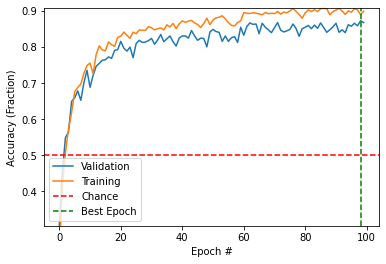

In [ ]:
plot_acc(history)

Validation and training are very close that is great for 0.8240 

## 🖼 **Trying it on my own inputs**

In [ ]:
#@title Run this to download whiteboard things!
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode
import zipfile
import os
import cv2

canvas_html = """
<canvas width=%d height=%d></canvas>
<br>
<button>Save Image</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.lineWidth = %d
ctx.fillStyle = "#eeeeee";
ctx.fillRect(0, 0, canvas.width, canvas.height);
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

if not os.path.isdir("image_data"):
  os.mkdir("image_data")

def draw(w=28, h=28, line_width=1):
  path = os.path.join("image_data/")
  if not os.path.isdir(path):
    os.mkdir(path)

  num_files = len(next(os.walk(path))[2]) #dir is your directory path as string
  display(HTML(canvas_html % (w, h, line_width)))
  data = eval_js("data")
  print(data)
  binary = b64decode(data.split(',')[1])
  # return binary
  filename = 'your_digit' + '.png'
  with open(os.path.join(path, filename), 'wb') as f:
    f.write(binary)
  return filename

def convert_img(img):
  new_img = np.zeros((28,28))
  for x in range(0, new_img.shape[0]*2, 2):
    for y in range(0, new_img.shape[1]*2, 2):
      new_pix = np.min(img[x:x+2,y:y+2,0])
      if new_pix==0:
        new_img[x//2][y//2]=255
      else:
        new_img[x//2][y//2]=0     
  return new_img

Frawing to a *tiny* whiteboard generated by running the code to draw a number on .



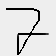

In [ ]:
img_path = draw(w=56, h=56)

 visualizing the image 

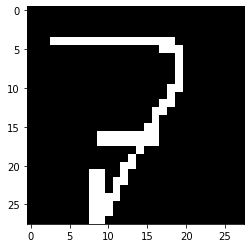

In [ ]:
import matplotlib
img = convert_img(matplotlib.image.imread('image_data/your_digit.png'))
plt.imshow(img, cmap='gray')

My network predicts what class your image is in.

In [ ]:
probabilities = model.predict(np.array([img.reshape((784,))]))
print("Probabilities:", probabilities)
print("Prediction:", np.argmax(probabilities))

Probabilities: [[2.2498870e-03 4.2387050e-02 6.2923783e-01 3.0898858e-02 1.7624882e-01
  6.0906820e-04 1.0029669e-02 3.1373817e-02 2.6056953e-02 5.0908063e-02]]
Prediction: 2


# Explainability through Saliency Maps

Neural networks have achieved incredible results in many fields. But they have a big problem: it’s very difficult to explain exactly why a neural network makes the decisions it does. This makes it difficult to trust them in high-stakes applications like medicine, self-driving cars, and criminal justice - would you trust an AI that diagnosed you with a disease, but couldn’t explain why?

Other classifiers are much more explainable:

*   With logistic regression, we can see the coefficient (importance) attached to each input feature.
*   With a decision tree, we can trace a particular decision down the tree.
*   With KNN, we can examine the nearby neighbors.

The NN, above, works well. For example, let's try choosing an image from our dataset and classifying it.

In [ ]:
image_index = 1000 # pick any image you'd like
input_image = X_test[image_index] 
print (input_image.shape) 
print (input_image) #How many numbers are there? What does each represent?

plt.imshow(input_image.reshape(28,28).astype(int), cmap='gray')
plt.show()

print('Classification:')
print (input_image.shape) 
print(np.argmax(model.predict(np.array([input_image]))))

IndexError: ignored

But why did the NN reach that decision? It’s really hard to give a clear answer! The NN relies on multiplying input features by the weights it has set. I can print out and look at the hundreds of weights:


In [ ]:
for layer_weights in history.model.weights:
  print (layer_weights)

<tf.Variable 'dense/kernel:0' shape=(784, 20) dtype=float32, numpy=
array([[-0.04063214,  0.00666941,  0.07631543, ...,  0.02458574,
         0.03585589, -0.00713437],
       [-0.0135903 ,  0.04018891, -0.08601846, ...,  0.03059164,
         0.02105013,  0.02938177],
       [ 0.0842036 , -0.05336151, -0.07812765, ...,  0.07835837,
        -0.01117543,  0.03209521],
       ...,
       [ 0.07135318, -0.05708632,  0.08048932, ..., -0.03693808,
         0.0467601 , -0.00832327],
       [ 0.02598927,  0.07113719, -0.05119687, ..., -0.00505825,
        -0.07873629, -0.05479746],
       [ 0.05932313, -0.02357597,  0.02233947, ...,  0.04526892,
        -0.01250333,  0.04727402]], dtype=float32)>
<tf.Variable 'dense/bias:0' shape=(20,) dtype=float32, numpy=
array([-5.41186659e-04,  2.24281648e-05, -3.38401675e-04, -1.01252608e-05,
       -1.27401101e-04, -9.84172584e-05,  2.86110473e-04, -4.30388427e-05,
       -8.98270227e-05,  2.17459194e-04, -4.12335154e-04,  5.18087880e-04,
        5.937724

Unfortunately, that probably didn’t help me make a useful explanation.

Researchers are currently studying ways to make neural networks more explainable. One approach is using **saliency maps** to figure out the saliency (importance) of each individual pixel. Check out a demo [here](https://lrpserver.hhi.fraunhofer.de/image-classification). Intuitively, we're trying to understand the neural network by tracking what it "pays attention" to, in the same way that psychologists study babies' cognition by [tracking what babies look at](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3259733/).

In this exercise, I will build a simple version of a saliency map for the image you chose above  and see what pixels were most important in helping the network make its classification.

To do this, I'll investigate the effects of changing each pixel a little bit. If changing a particular pixel changes the result a lot, concluding that pixel must be important for classifying. If changing that pixel doesn't change the result, concluding that pixel is unimportant.


I am going to use the raw predicted probabilities, rather than the final classification.

Now, we need to calculate the saliency for each pixel (really, each R/G/B value). The core idea is that a pixel's saliency is the average value of 

 $D = |\frac{\Delta probability}{\Delta pixel}|$
 
 where $\Delta$ is the amount of change. If a small change in the pixel value results in a large change in the probability (either up or down), this pixel is important. 
Here's the game plan:

*   Consider each pixel value in turn.
*   Make a copy of the image array before you change anything!
*   Make the pixel value larger or smaller by various amounts. Each time, find the NN's probability for the correct class with the changed pixel value, and calculate the value of D.
*   Repeat the previous step a few times, and calculate the pixel's saliency: the average value of D.
*   Store the saliency of each pixel in a list, so that we can visualize it later.



In [ ]:
saliencies = [] #eventually, will be the same size as input_image

input_probs = model.predict(np.array([input_image]))
input_class = np.argmax(new_y_test[image_index])

for index, pixel in enumerate(input_image):
  if index%100 == 0: #will track progress - this might take a while
    print (index)
  
  changed_input = input_image.copy() #make sure not to change the original input_image!
  
  D_list = []
  for pixel_change in [-100, -50, -30, 30, 50, 100]:
    changed_pixel = pixel + pixel_change   #In changed_input, change the value of this pixel by some amount.
    if 0 <= changed_pixel <= 255:   #Use the NN to classify changed_input.
      changed_input[index] = changed_pixel 
      changed_pred = model.predict(np.array([changed_input]))
      D = (changed_pred[0,input_class] - input_probs[0,input_class])/pixel_change
      D_list.append(np.abs(D))    #Calculate the value of D.
  saliency = np.mean(D_list)
  saliencies.append(saliency)
print (saliencies)

0
100
200
300
400
500
600
700
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

My saliencies are probably very small values, since each individual pixel has a small effect on the output. 
Here are the current min and max:

In [ ]:
sal_array = np.array(saliencies)
print (sal_array.min(), sal_array.max())
print (sal_array.shape)

0.0 0.0
(784,)


To plot the saliencies, I need to do some arithmetic to transform them to a range of 0 to 1. 

In [ ]:
print (sal_array.min(), sal_array.max())

sal_array = (sal_array - sal_array.min())/(sal_array.max()-sal_array.min())
print (sal_array.min(), sal_array.max())

sal_array.shape

0.0 0.0
nan nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


(784,)



As I am not getting great results, I try experimenting with how much I am  changing the pixel values.

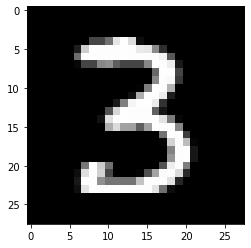

/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:993: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


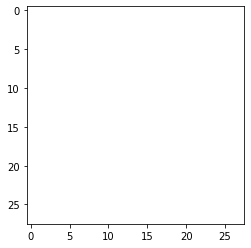

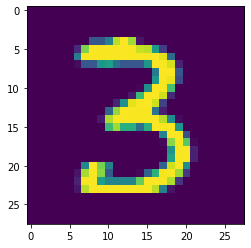

In [ ]:
#Plot our original image
plt.imshow(input_image.reshape(28,28).astype(int), cmap="gray")
plt.show()

#Plot our saliency map: the brighter, the higher the saliency
plt.imshow(sal_array.reshape(28,28))
plt.show()

#Plot our saliency map superimposed on the image
plt.imshow(input_image.reshape(28,28).astype(int))
plt.imshow(sal_array.reshape(28,28),alpha=0.6)
plt.show()

This gives more insight into the neural network. We can tell which pixels matter in its decisions. It makes it brighter for the number three and matte color purple for the background even though it is not visible when plotted alone. 
